## Input is all columns and output(Target) is y column


## you need to implement

### Logisitic regression
### Naive bayes
### SVC classifier
### Decision Tree classifier
### Random Forest Classifier


#### Compare all the R2 Scores and execution speed to decide the best one 

# Logisitic regression

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Read Train Data and Test Data

In [2]:
#read data train
data_train = pd.read_csv(r"F:\my projects\Users\datasets\bank-full.csv",sep=";")
data_train


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
#read data_test
data_test = pd.read_csv(r"F:\my projects\Users\datasets\bank-full.csv", sep=";")
data_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Preprocessing the data

In [4]:
#Encoder categorial features
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day_of_week'] = le.fit_transform(new_df['day_of_week'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [5]:
# concat and replace column with basic
data = pd.concat([data_train, data_test])
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

### Checking for null values

In [6]:
# check missing values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Data Visualization

<AxesSubplot:xlabel='count', ylabel='job'>

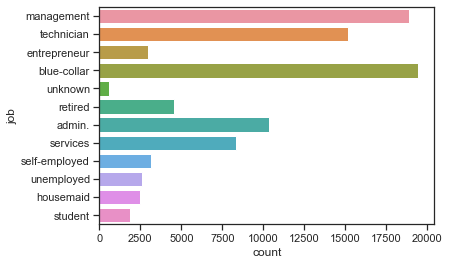

In [7]:
# Visualize job column
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)


In [8]:
# select job is unknown
data = data[data.job != 'unknown']

<AxesSubplot:xlabel='count', ylabel='marital'>

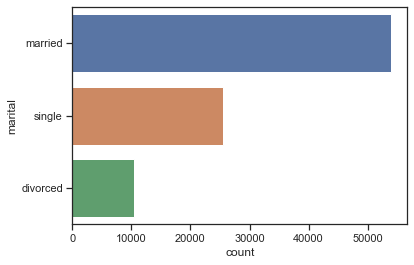

In [9]:
# cisualize marital feature
sns.countplot(y='marital', data=data)

In [10]:
# count marital column values
data.marital.value_counts()


married     54022
single      25444
divorced    10380
Name: marital, dtype: int64

In [11]:
#select unknow values in marital and loan features
data = data[data.marital != 'unknown']
data = data[data.loan != 'unknown']

<AxesSubplot:xlabel='count', ylabel='education'>

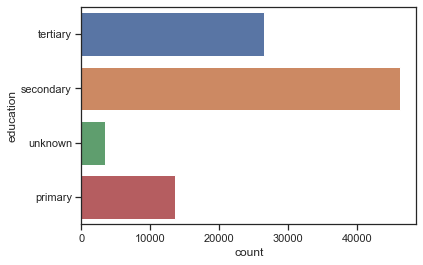

In [12]:
#visualize education column
sns.countplot(y='education', data=data)

In [13]:
# select illiterate value from education
data = data[data.education != 'illiterate']

In [14]:
# describe data
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,89846.000000,89846.000000,89846.000000,89846.000000,89846.000000,89846.000000,89846.000000
mean,40.893529,1359.643011,15.813882,258.294838,2.760345,40.321016,0.581996
std,10.604340,3045.074573,8.319994,257.712336,3.092820,100.254588,2.309064
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,447.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1421.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='count', ylabel='y'>

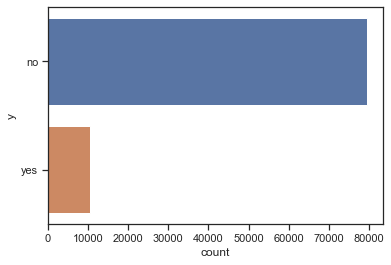

In [15]:
# visualize label column
sns.countplot(y='y', data=data)


### Checking for outliers using boxplots

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


<AxesSubplot:xlabel='y', ylabel='age'>

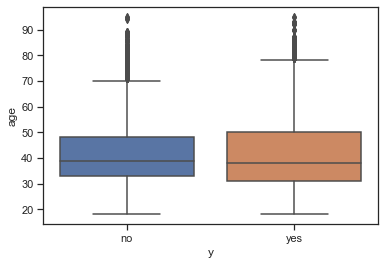

In [17]:
# visualize education column
sns.boxplot(x="y", y="age", data=data)

<AxesSubplot:xlabel='y', ylabel='duration'>

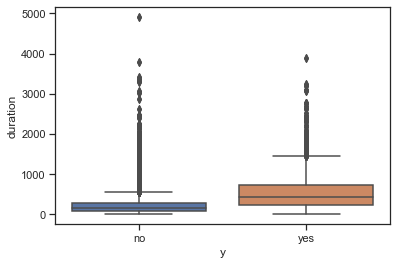

In [18]:
#visualize housing and label
sns.boxplot(x='y', y='duration', data=data)

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='campaign'>

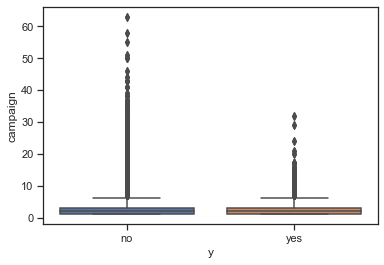

In [19]:
# visualize label and job 
sns.boxplot(data['y'],data['campaign'])


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='previous'>

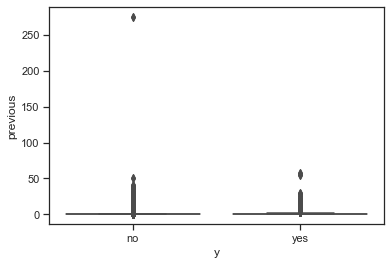

In [20]:
# visualize label and job 
sns.boxplot(data['y'],data['previous'])


### Dropping less meaningful columns

<AxesSubplot:xlabel='education', ylabel='count'>

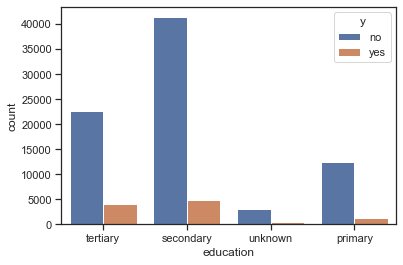

In [21]:
# visualize education and label
sns.countplot(x='education',hue='y',data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

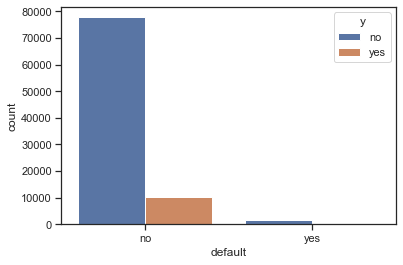

In [22]:
# visualize default and label
sns.countplot(x='default',hue='y',data=data)

It is skewed to 0. So We can drop this.

In [23]:
# drop default because of skewed
data = data.drop('default',axis=1)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

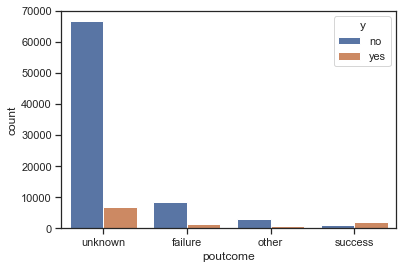

In [24]:
# visualize poutcome and label
sns.countplot(x='poutcome',hue='y',data=data)

In [25]:
# drop poutcome
data = data.drop('poutcome',axis=1)

<AxesSubplot:xlabel='loan', ylabel='count'>

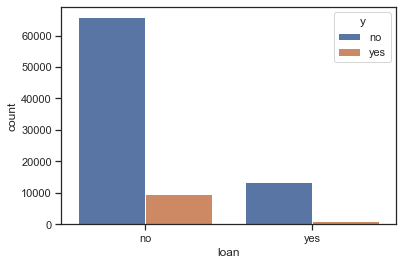

In [26]:
#visualize loan and label
sns.countplot(x='loan',hue='y',data=data)

<AxesSubplot:xlabel='contact', ylabel='count'>

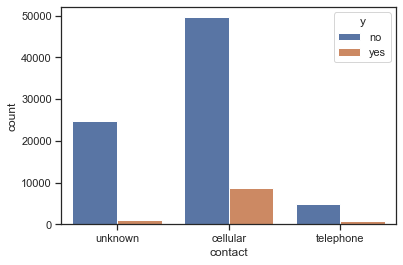

In [27]:
#visualize contact and label
sns.countplot(x='contact',hue='y',data=data)

In [28]:
data

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,2143,yes,no,unknown,5,may,261,1,-1,0,no
1,44,technician,single,secondary,29,yes,no,unknown,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1,-1,0,no
5,35,management,married,tertiary,231,yes,no,unknown,5,may,139,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,no,cellular,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,1729,no,no,cellular,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,5715,no,no,cellular,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,668,no,no,telephone,17,nov,508,4,-1,0,no


In [29]:
#drop contact
data = data.drop('contact',axis=1)

In [30]:
#drop unnecessary column
data = data.drop(['housing','loan','job','duration','month','day','marital','education'],axis=1)

In [31]:
data

,age,balance,campaign,pdays,previous,y
0,58,2143,1,-1,0,no
1,44,29,1,-1,0,no
2,33,2,1,-1,0,no
3,47,1506,1,-1,0,no
5,35,231,1,-1,0,no
...,...,...,...,...,...,...
45206,51,825,3,-1,0,yes
45207,71,1729,2,-1,0,yes
45208,72,5715,5,184,3,yes
45209,57,668,4,-1,0,no


### Splitting into train and test data

In [32]:
#split data into train and test data
X = data.drop('y',axis = 1).values
y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
#Scaler data train
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [34]:
#Feature selection with PCA
pca = PCA(n_components=5)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [35]:
X_train.shape


(71876, 5)

### Building different Models and validating using kfold cross validation

In [36]:
# append all model into an array
models = []
models.append(('LogReg', LogisticRegression()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RandForest',RandomForestClassifier()))
models.append(('SVM', SVC()))

In [37]:
# do kfold cross validation into modelling
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

LogReg: 0.8825338075536522
Decison-Tree: 0.9270131697757131
Naive Bayes: 0.859953155742663
KNN: 0.8814764675425225
RandForest: 0.9370721666545693
SVM: 0.8837164114103215


 ### Testing with the test data

In [38]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [39]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [40]:
RandFor = RandomForestClassifier()
RandFor.fit(X_train, Y_train)
predictions = RandFor.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))



Accuracy :  0.847968836950473
Confusion Matrix : 
 [[14894   959]
 [ 1773   344]]
Classification Report: 
               precision    recall  f1-score   support

          no       0.89      0.94      0.92     15853
         yes       0.26      0.16      0.20      2117

    accuracy                           0.85     17970
   macro avg       0.58      0.55      0.56     17970
weighted avg       0.82      0.85      0.83     17970



In [41]:
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, Y_train)
predictions = LogisticRegression.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))


Accuracy :  0.8809682804674458
Confusion Matrix : 
 [[15827    26]
 [ 2113     4]]
Classification Report: 
               precision    recall  f1-score   support

          no       0.88      1.00      0.94     15853
         yes       0.13      0.00      0.00      2117

    accuracy                           0.88     17970
   macro avg       0.51      0.50      0.47     17970
weighted avg       0.79      0.88      0.83     17970



In [42]:
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, Y_train)
predictions = DecisionTreeClassifier.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))


Accuracy :  0.7208124652198108
Confusion Matrix : 
 [[12263  3590]
 [ 1427   690]]
Classification Report: 
               precision    recall  f1-score   support

          no       0.90      0.77      0.83     15853
         yes       0.16      0.33      0.22      2117

    accuracy                           0.72     17970
   macro avg       0.53      0.55      0.52     17970
weighted avg       0.81      0.72      0.76     17970



In [43]:
GaussianNB = GaussianNB()
GaussianNB.fit(X_train, Y_train)
predictions = GaussianNB.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))


Accuracy :  0.8583750695603785
Confusion Matrix : 
 [[15205   648]
 [ 1897   220]]
Classification Report: 
               precision    recall  f1-score   support

          no       0.89      0.96      0.92     15853
         yes       0.25      0.10      0.15      2117

    accuracy                           0.86     17970
   macro avg       0.57      0.53      0.54     17970
weighted avg       0.81      0.86      0.83     17970



In [44]:
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, Y_train)
predictions = KNeighborsClassifier.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))


Accuracy :  0.8730662214802448
Confusion Matrix : 
 [[15264   589]
 [ 1692   425]]
Classification Report: 
               precision    recall  f1-score   support

          no       0.90      0.96      0.93     15853
         yes       0.42      0.20      0.27      2117

    accuracy                           0.87     17970
   macro avg       0.66      0.58      0.60     17970
weighted avg       0.84      0.87      0.85     17970



In [45]:
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))


Accuracy :  0.8824707846410684
Confusion Matrix : 
 [[15823    30]
 [ 2082    35]]
Classification Report: 
               precision    recall  f1-score   support

          no       0.88      1.00      0.94     15853
         yes       0.54      0.02      0.03      2117

    accuracy                           0.88     17970
   macro avg       0.71      0.51      0.48     17970
weighted avg       0.84      0.88      0.83     17970



In [52]:
print("Score:  \n", svm.score(X,y))
print("Score:  \n", KNeighborsClassifier.score(X,y))
print("Score:  \n", GaussianNB.score(X,y))
print("Score:  \n", DecisionTreeClassifier.score(X,y))
print("Score:  \n", LogisticRegression.score(X,y))
print("Score:  \n", RandFor.score(X,y))
#Y_test, predictions

Score:  
 0.8830220599692807
Score:  
 0.7342786545867374
Score:  
 0.11960465685728915
Score:  
 0.672417247289807
Score:  
 0.1815105847783986
Score:  
 0.6728624535315985


### Compare all the R2 Scores and execution speed to decide the best one
As we compare all the scores and execution speed- SVC and RandomForestClassifier are taking much more time to execute 
and LogisticRegression, DecisionTreeClasifier, GaussianNB, KNeighborsClassifier are taking less time execution speed.SVC and RandomForestClassifier are having better accuracy but these are taking much more time to execute.
So when compare with LogisticRegression, DecisionTreeClasifier, GaussianNB, KNeighborsClassifier; LogisticRegression & KNeighborsClassifier is having better accuracy when compare with DecisionTreeClasifier, GaussianNB. 
So, I conclude that LogisticRegression & KNeighborsClassifier are best models for this dataset with accuracy and execution speed.

                                                                                                 Thank you
                                                                                                 Latheesh B
                                                                                                 SURE Trust
                                                                                              (G-27 Python & ML)
                                                                                                